In [4]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
# You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and 
# longitudes into the coordinates list before moving on.

coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

# Import the requests library. (6.2)
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7aaedeac7434dbeebbf811a6cffe63ca


In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

599

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | gay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | yarmouth
Processing Record 7 of Set 1 | deputatskiy
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | ulaangom
Processing Record 12 of Set 1 | xinzhi
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | dandeli
Processing Record 16 of Set 1 | hirara
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | warqla
City not found. Skipping...
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | kupang
Processing Record 23 of Set 1 | sai

Processing Record 39 of Set 4 | suntar
Processing Record 40 of Set 4 | razole
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | vardo
Processing Record 44 of Set 4 | san policarpo
Processing Record 45 of Set 4 | agirish
Processing Record 46 of Set 4 | sao felix do xingu
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | gazanjyk
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | stornoway
Processing Record 1 of Set 5 | plettenberg bay
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | camocim
Processing Record 5 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 6 of Set 5 | jumla
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | lujan
Processing Record 10 of Set 5 | havre-saint-pierre
Processing Record 11 of Set 5 | mou

Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | la palma
Processing Record 28 of Set 8 | port hope
Processing Record 29 of Set 8 | kawalu
Processing Record 30 of Set 8 | buritizeiro
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 33 of Set 8 | olafsvik
Processing Record 34 of Set 8 | merauke
Processing Record 35 of Set 8 | fukue
Processing Record 36 of Set 8 | muli
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | whyalla
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | baykit
Processing Record 42 of Set 8 | biak
Processing Record 43 of Set 8 | lishu
Processing Record 44 of Set 8 | belyy
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | mollendo
Processing Record 47 of Set 8 | qianguo
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | ust-kamchatsk
C

Processing Record 15 of Set 12 | baijiantan
Processing Record 16 of Set 12 | pisco
Processing Record 17 of Set 12 | houma
Processing Record 18 of Set 12 | meadow lake
Processing Record 19 of Set 12 | poso
Processing Record 20 of Set 12 | raahe
Processing Record 21 of Set 12 | karaman
Processing Record 22 of Set 12 | yenagoa
Processing Record 23 of Set 12 | linxia
Processing Record 24 of Set 12 | saharanpur
Processing Record 25 of Set 12 | charters towers
Processing Record 26 of Set 12 | springfield
Processing Record 27 of Set 12 | bayeux
Processing Record 28 of Set 12 | oksfjord
Processing Record 29 of Set 12 | olga
Processing Record 30 of Set 12 | sistranda
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | san quintin
Processing Record 34 of Set 12 | birjand
Processing Record 35 of Set 12 | altus
Processing Record 36 of Set 12 | chase
Processing Record 37 of Set 12 | george town
Processing Record 38 of Set 12 | la tuque


In [17]:
len(city_data)

553

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,47.32,73,99,12.10,FO,2022-04-27 16:00:09
1,Bluff,-46.6000,168.3333,49.91,84,69,6.02,NZ,2022-04-27 15:55:55
2,Gay,51.4666,58.4552,59.58,48,54,8.41,RU,2022-04-27 16:00:14
3,Yellowknife,62.4560,-114.3525,35.56,69,100,4.00,CA,2022-04-27 16:00:16
4,Mataura,-46.1927,168.8643,41.38,98,9,2.10,NZ,2022-04-27 16:00:19
5,Yarmouth,41.7057,-70.2286,59.34,71,75,6.91,US,2022-04-27 16:00:21
6,Deputatskiy,69.3000,139.9000,2.59,99,100,1.48,RU,2022-04-27 16:00:21
7,Rio Grande,-32.0350,-52.0986,69.91,65,68,14.70,BR,2022-04-27 15:55:56
8,Iqaluit,63.7506,-68.5145,11.93,78,75,23.00,CA,2022-04-27 16:00:24
9,Tiksi,71.6872,128.8694,-4.07,100,89,3.98,RU,2022-04-27 16:00:25


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-04-27 16:00:09,62.2266,-6.5890,47.32,73,99,12.10
1,Bluff,NZ,2022-04-27 15:55:55,-46.6000,168.3333,49.91,84,69,6.02
2,Gay,RU,2022-04-27 16:00:14,51.4666,58.4552,59.58,48,54,8.41
3,Yellowknife,CA,2022-04-27 16:00:16,62.4560,-114.3525,35.56,69,100,4.00
4,Mataura,NZ,2022-04-27 16:00:19,-46.1927,168.8643,41.38,98,9,2.10


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1651111279.9693613

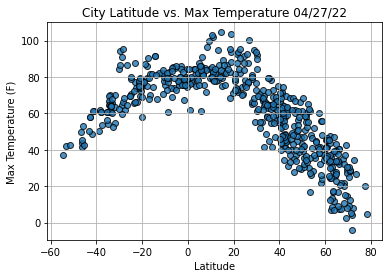

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

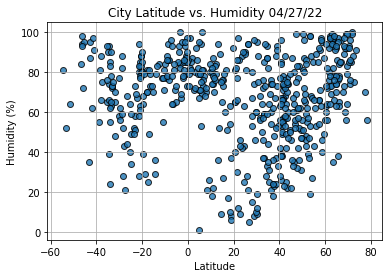

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

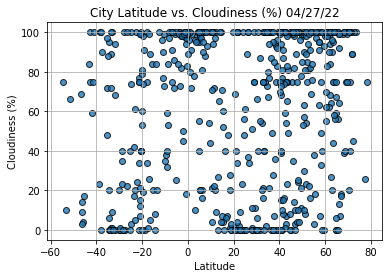

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

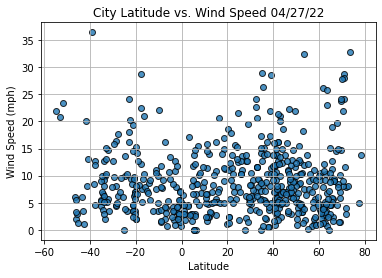

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()